In [1]:
#импортируем библиотеки
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from sqlalchemy import text, create_engine

In [2]:
#создаём доступ к базе данных
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# Анализ базы данных приложения для чтения книг по подписке

## Цели исследования

Анализ базы данных приложения для чтения книг по подписке для формирования ценностного предложения нового продукта - причины, по которым клиенты выберут именно это приложение.

## Используемые данные

В базе денных содржатся таблицы с данными о:
1. книгах, 
2. издательствах, 
3. авторах, 
4. отывах,
5. рейтинге.

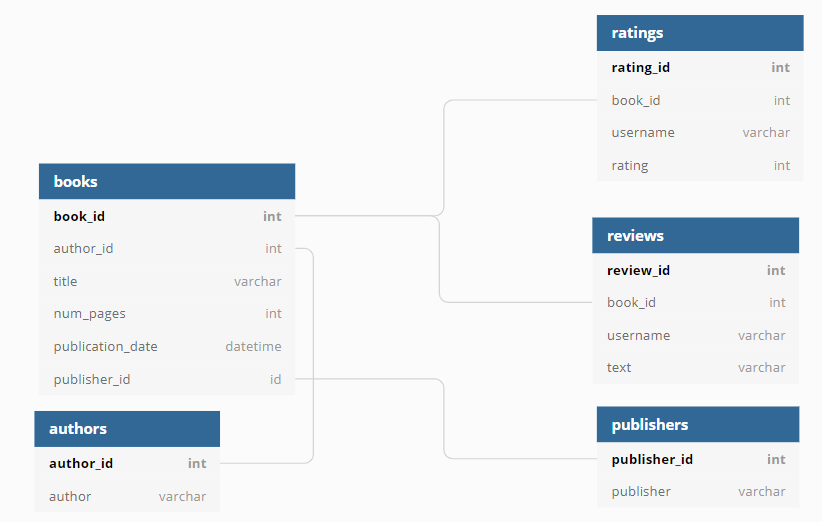

In [3]:
Image('https://pictures.s3.yandex.net/resources/scheme_1589269096.png')

## Обзор данных

### Таблица books

In [4]:
query = '''SELECT * FROM books'''
con=engine.connect()
books = pd.io.sql.read_sql(sql=text(query), con = con)
books.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Сделаем функцию для просмотра информации о датафрейме.

In [5]:
def table_info(df):
    info = df.info()
    nunique = df.nunique()
    duplicates = df[df.duplicated() == True].count()
    isnull = df[df.isnull()==True].count()
    return info, print(f'Количество уникальных значений: {nunique}'), print(
        f'Дубликаты: {duplicates}'), print(f'Пропуски: {isnull}');
    
table_info(books)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
Количество уникальных значений: book_id             1000
author_id            636
title                999
num_pages            454
publication_date     618
publisher_id         340
dtype: int64
Дубликаты: book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
Пропуски: book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publi

(None, None, None, None)

В таблице содержится 1000 идентификаторов книг и 999 уникальных названий. Значит, дублируется некоторая книга. 

In [6]:
books[books['title'].duplicated()]['title']

426    Memoirs of a Geisha
Name: title, dtype: object

In [7]:
books[books['title']== 'Memoirs of a Geisha']

,book_id,author_id,title,num_pages,publication_date,publisher_id
425,426,39,Memoirs of a Geisha,434,2005-11-15,241
426,427,39,Memoirs of a Geisha,503,2005-11-22,311


Видимо, одну книгу выпустили два издания. Это не ошибка.

In [8]:
print(books['publication_date'].min())
print(books['publication_date'].max())

1952-12-01
2020-03-31


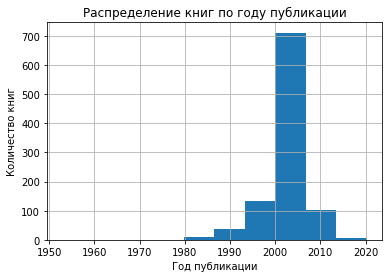

In [9]:
import matplotlib.pyplot as plt

books['publication_date'].hist()

plt.xlabel('Год публикации');
plt.ylabel('Количество книг');
plt.title('Распределение книг по году публикации');

В таблице books содержится информация о 999 книгах, 636 авторах, 340 издательствах.
Данные о книгах, изданных с 1 декабря 1952 по 31 марта 2020.

Явные дубликаты и пропуски отсутствуют.

### Таблица authors

In [10]:
query = '''SELECT * FROM authors'''
authors = pd.io.sql.read_sql(sql=text(query), con = con)
authors.head()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [11]:
table_info(authors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
Количество уникальных значений: author_id    636
author       636
dtype: int64
Дубликаты: author_id    0
author       0
dtype: int64
Пропуски: author_id    0
author       0
dtype: int64


(None, None, None, None)

В таблице authors содержится информация о 636 авторах - что совпадает с данными из таблицы books. Дубликаты и пропуски отсутствуют.

### Таблица ratings

In [12]:
query = '''SELECT * FROM ratings'''
ratings = pd.io.sql.read_sql(sql=text(query), con = con)
ratings.head()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [13]:
table_info(ratings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
Количество уникальных значений: rating_id    6456
book_id      1000
username      160
rating          5
dtype: int64
Дубликаты: rating_id    0
book_id      0
username     0
rating       0
dtype: int64
Пропуски: rating_id    0
book_id      0
username     0
rating       0
dtype: int64


(None, None, None, None)

В таблице rating содержится информация о 160 пользователях, которые оставили 6 456 оценок книг. Дубликаты и пропуски отсутствуют.

### Таблица reviews

In [14]:
query = '''SELECT * FROM reviews'''
reviews = pd.io.sql.read_sql(sql=text(query), con = con)
reviews.head()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [15]:
table_info(reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
Количество уникальных значений: review_id    2793
book_id       994
username      160
text         2793
dtype: int64
Дубликаты: review_id    0
book_id      0
username     0
text         0
dtype: int64
Пропуски: review_id    0
book_id      0
username     0
text         0
dtype: int64


(None, None, None, None)

Таблица reviews содержит информацию о 160 пользователях (столько же, сколько и в ratings). Они оставили отзывы 994 книгах (не все книги получили отзывы). Всего было оставлено 2 793 отзыва. Дубликаты и пропуски отсутствуют.

### Таблица publishers

In [16]:
query = '''SELECT * FROM publishers'''
publishers = pd.io.sql.read_sql(sql=text(query), con = con)
publishers.head()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [17]:
table_info(publishers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
Количество уникальных значений: publisher_id    340
publisher       340
dtype: int64
Дубликаты: publisher_id    0
publisher       0
dtype: int64
Пропуски: publisher_id    0
publisher       0
dtype: int64


(None, None, None, None)

Таблица publishers содержит информацию о 340 издательствах (столько же, сколько и в таблице books). Дубликаты и пропуски отсутствуют.

Все таблицы содержат заявленные данные.

## Запросы

### Сколько книг вышло после 1 января 2000 года

In [18]:
query = '''

SELECT COUNT(*)
FROM books
WHERE publication_date > '2000-01-01'

'''
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,819


После 1 января 2000 года вышло 819 книг.

###  Количество обзоров и средняя оценка каждой книги

In [20]:
query = '''

SELECT b.book_id,
    title,
    AVG(rating) mean_rating,
    COUNT(DISTINCT(review_id)) count_reviews
FROM books b LEFT JOIN ratings rt ON b.book_id=rt.book_id
LEFT JOIN reviews r ON rt.book_id = r.book_id
GROUP BY b.book_id

'''
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,title,mean_rating,count_reviews
0,1,'Salem's Lot,3.666667,2
1,2,1 000 Places to See Before You Die,2.500000,1
2,3,13 Little Blue Envelopes (Little Blue Envelope...,4.666667,3
3,4,1491: New Revelations of the Americas Before C...,4.500000,2
4,5,1776,4.000000,4
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3.666667,3
996,997,Xenocide (Ender's Saga #3),3.400000,3
997,998,Year of Wonders,3.200000,4
998,999,You Suck (A Love Story #2),4.500000,2


Для каждой из 1000 книг рассчитаны средний рейтинг и количество отзывов.

### Издательство, которое выпустило наибольшее число книг толще 50 страниц (так будут исключены из анализа брошюры)

In [21]:
query = '''

SELECT publisher,
    COUNT(publisher)
FROM publishers p JOIN books b ON p.publisher_id=b.publisher_id
WHERE num_pages > 50
GROUP BY publisher
ORDER by count DESC
LIMIT 1

'''
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher,count
0,Penguin Books,42


Больше всего книг (исключая брошюры менее 50 страниц) выпустило издательство Penguin Books - 42 книги.

### Автор с самой высокой средней оценкой книг (учитывая только книги с 50 и более оценками)

In [22]:
query = '''
WITH ba AS(
SELECT b.author_id,
    b.book_id,
    COUNT(r.rating_id) AS rating_count,
    AVG(r.rating) AS mean_rating
FROM books b JOIN ratings r ON b.book_id = r.book_id
GROUP BY b.book_id
HAVING COUNT(r.rating_id) >= 50)

SELECT a.author,
    AVG(ba.mean_rating)
FROM ba INNER JOIN authors a ON ba.author_id = a.author_id
GROUP BY a.author
ORDER BY AVG(ba.mean_rating) DESC
LIMIT 1

'''
pd.io.sql.read_sql(sql=text(query), con = con)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.283844


Автор с самой высокой средней оценкой (среди авторов книг c 50 и более оценками) - J.K. Rowling/Mary GrandPré. Её оценка - 4.28.

### Среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [23]:
query = '''
WITH u AS(
SELECT username,
    COUNT(username)
FROM ratings
GROUP BY username
HAVING COUNT(username)>48),
r AS (
SELECT u.username,
    COUNT(review_id)
FROM u INNER JOIN reviews r ON u.username = r.username
GROUP BY u.username)
SELECT AVG(count)
FROM r
'''
pd.io.sql.read_sql(sql=text(query), con = con)

,avg
0,24.0


В среднем, пользователи, которые оценили более 48 книг, оставили 24 отзыва каждый.

## Выводы

База данных приложения соответствует заявленной. В пяти таблицах содержатся данные о 1 000 книг, 636 авторах, 340 издательствах. Данные о книгах, изданных с 1 декабря 1952 по 31 марта 2020.
А также о 160 пользователях, оставивших 2 793 отзыва и 6 456 оценки книг. 

- После 1 января 2000 года вышло 819 книг.
- Была рассчитана средняя оценка книг и количество отзывов на них.
- Больше всего книг (исключая брошюры менее 50 страниц) выпустило издательство Penguin Books - 42 книги.
- Автор с самой высокой средней оценкой (среди авторов книг c 50 и более оценками) - J.K. Rowling/Mary GrandPré. Её оценка - 4.28.
- В среднем, пользователи, которые оценили более 48 книг, оставили 24 отзыва каждый.

Рекомендации:
Высокие оценки книг и авторов, а также отзывы на книги, могут стимулировать интерес пользователей. Поэтому в приложении стоит развивать систему поощрения за оценки и отзывы. В таком случае одни пользователи будут заинтересованы в написании отзывов и выставлении рейтинга книги, а другим пользователям будет проще выбрать книгу, что упростит пользование приложением.

Также стоит категоризировать книги на жанры, чтобы создать систему рекомендаций. Например, пользователь при регистрации указывать предпочитаемые жанры, а приложение выдаёт рекомендации - книги этих жанров с высокими оценками и обзорами. 